# House Price Prediction

**Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, we are wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues**

# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from numpy import sqrt 

In [2]:
df = pd.read_csv('data.csv')

In [3]:
#Let's have a look at the dataset
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Data Preprocessing 🔧

In [4]:
# Checking if any columns have missing values
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [5]:
# Shape if the dataset
df.shape

(4600, 18)

In [6]:
#check basic statistics
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
# Checking the types of data
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

<AxesSubplot:>

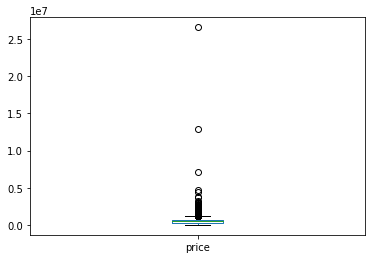

In [8]:
# Checking for outliers using boxplot for price only
df['price'].plot.box()

Oh crap! we have some outliers. Let's treat it😀.

In [9]:
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

322875.0
654962.5
332087.5
-175256.25 1153093.75


In [10]:
df = df[df['price']< Upper_Whisker]

<AxesSubplot:>

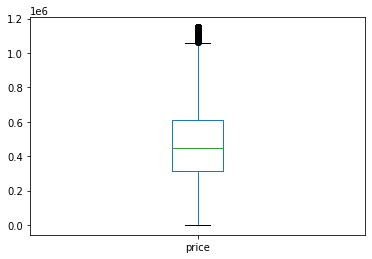

In [11]:
df['price'].plot.box()

In [12]:
df.shape

(4360, 18)

Awesome!😀

# Modeling ⚠

# Simple Linear Regression

To perform a simple linear regression we need 2 variables. We will take the variable which have highest correlation with the target variable which is price. 

In [13]:
corr = df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.279719,0.434377,0.579565,0.094328,0.267372,0.043174,0.188747,0.037540,0.500765,0.208216,0.061310,-0.068504
bedrooms,0.279719,1.000000,0.520913,0.595537,0.057786,0.154098,-0.026776,0.059441,0.018092,0.463337,0.307149,0.156280,-0.065461
bathrooms,0.434377,0.520913,1.000000,0.729538,0.086859,0.487828,0.038807,0.132309,-0.139777,0.650598,0.225254,0.513843,-0.236921
sqft_living,0.579565,0.595537,0.729538,1.000000,0.198494,0.334342,0.050714,0.206131,-0.082221,0.859460,0.367586,0.334316,-0.138716
sqft_lot,0.094328,0.057786,0.086859,0.198494,1.000000,-0.002503,0.023283,0.077140,0.006164,0.197157,0.024646,0.042109,-0.017055
floors,0.267372,0.154098,0.487828,0.334342,-0.002503,1.000000,0.013572,-0.010122,-0.293880,0.525608,-0.310537,0.499418,-0.242641
waterfront,0.043174,-0.026776,0.038807,0.050714,0.023283,0.013572,1.000000,0.328499,0.013068,0.029904,0.043534,-0.022390,0.002010
view,0.188747,0.059441,0.132309,0.206131,0.077140,-0.010122,0.328499,1.000000,0.044449,0.087909,0.238141,-0.059932,0.037165
condition,0.037540,0.018092,-0.139777,-0.082221,0.006164,-0.293880,0.013068,0.044449,1.000000,-0.203226,0.210931,-0.398827,-0.185677
sqft_above,0.500765,0.463337,0.650598,0.859460,0.197157,0.525608,0.029904,0.087909,-0.203226,1.000000,-0.159488,0.453491,-0.173558


<AxesSubplot:>

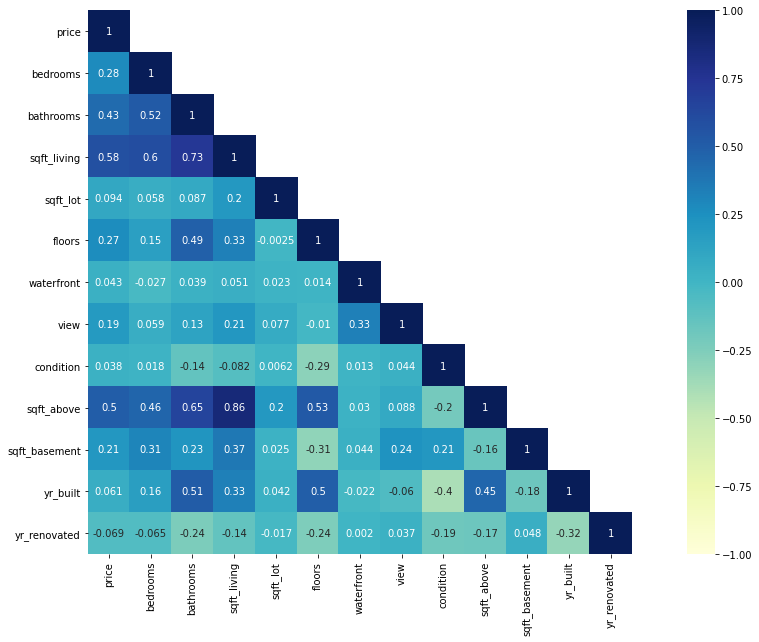

In [14]:
#let's plot to get a clear view
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, vmin=-1, vmax=1, mask=mask, square=True,annot=True, cmap="YlGnBu")

As we know our target variale is price we can see from the above graph that sqft_living has the highest positive correlation with the target price which is true to some extent also. So, we will be take sqft_living as 'x' and price as 'y'.😀

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

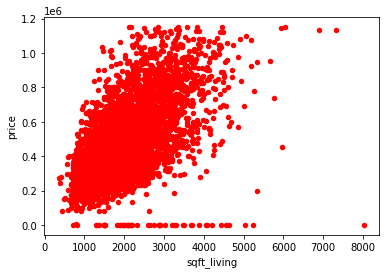

In [15]:
# Ploting price against sqft_living and checking variance
df.plot.scatter('sqft_living','price',color='r')

Not good it may result in poor outcome for linear regression.

In [16]:
x=df['sqft_living'].values.reshape(-1, 1)
y=df['price'].values.reshape(-1, 1)

In [17]:
# Diving the dataset into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [18]:
# Training the Liear Regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [19]:
# Predicting the price
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [20]:
# Checking the predicted score with the actual one
np.set_printoptions(precision=2)
print(np.concatenate((y_test_pred.reshape(len(y_test_pred),1), y_test.reshape(len(y_test),1)),1))

[[653595.16 957000.  ]
 [451396.93 809000.  ]
 [612236.43 585000.  ]
 ...
 [338043.37 450000.  ]
 [364084.05 349500.  ]
 [339575.18 250000.  ]]


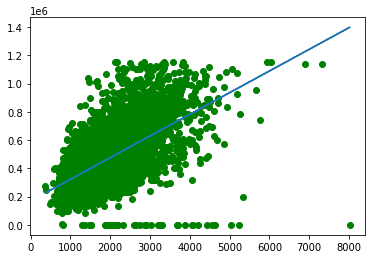

In [22]:
# The regression line has equation 𝑏₀ + 𝑏₁𝑥
# Checking the best fit line
reg_line = model.intercept_ + model.coef_*x 
plt.scatter(X_train,y_train,color='g')
plt.plot(x, reg_line)
plt.show()

# Model Evaluation ✅

In [23]:
# Checking the mean_absolute_error and r2_score
test_mae = round(mean_absolute_error(y_test, y_test_pred),3)
test_r2 = round(r2_score(y_test, y_test_pred),3)
score = model.score(X_test, y_test)

In [24]:
print("Test Results for Linear Regression Model:")
print(50 * '-')
print("Root mean squared error: ", round(sqrt(mean_squared_error(y_test, y_test_pred)),3))
print("Mean absolute error: ",test_mae)
print("Mean squared error: ",round(mean_squared_error(y_test, y_test_pred),3))
print("R-squared: ", test_r2)
print("Score: ", score)

Test Results for Linear Regression Model:
--------------------------------------------------
Root mean squared error:  176905.125
Mean absolute error:  140313.527
Mean squared error:  31295423224.708
R-squared:  0.36
Score:  0.36013759375860377


**The low r2 score of our model suggests that our regressive model has not fitted very well to the existing data. This suggests that our data is not suitable for linear regression.**

# Multiple Linear Regression

In [34]:
x=df.drop(['date','price','city','street','statezip','country'],axis=1).values
y=df['price'].values

In [35]:
# Diving the dataset into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [36]:
#Standardizing the data so that the mean of observed values is 0 and the standard deviation is 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
# Training the Liear Regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
# Predicting the price
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [39]:
# Checking the predicted score with the actual one
np.set_printoptions(precision=2)
print(np.concatenate((y_test_pred.reshape(len(y_test_pred),1), y_test.reshape(len(y_test),1)),1))

[[370684.46 310000.  ]
 [435212.46 219500.  ]
 [393804.46 328000.  ]
 ...
 [406108.46 531000.  ]
 [449164.46 299000.  ]
 [457372.46 557500.  ]]


# Model Evaluation ✅

In [40]:
# Checking the mean_absolute_error and r2_score
train_mae = round(mean_absolute_error(y_train, y_train_pred),3)
train_r2 = round(r2_score(y_train, y_train_pred),3)


test_mae = round(mean_absolute_error(y_test, y_test_pred),3)
test_r2 = round(r2_score(y_test, y_test_pred),3)
score = model.score(X_test, y_test)

In [42]:
print("Test Results for Linear Regression Model:")
print(50 * '-')
print("Root mean squared error: ", round(sqrt(mean_squared_error(y_test, y_test_pred)),3))
print("Mean absolute error: ",test_mae)
print("Mean squared error: ",round(mean_squared_error(y_test, y_test_pred),3))
print("R-squared: ", test_r2)
print("Score: ", score)

Test Results for Linear Regression Model:
--------------------------------------------------
Root mean squared error:  172847.301
Mean absolute error:  128133.131
Mean squared error:  29876189587.465
R-squared:  0.384
Score:  0.38448399258635124
